## Setup

### Import libraries

In [172]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib

from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, recall_score, precision_score
from sklearn.model_selection import train_test_split

from pyzipcode import ZipCodeDatabase

from xgboost import XGBRegressor, plot_tree


### Import data

In [173]:
df = pd.read_csv('https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing.csv')

## Exploration

In [174]:
df.shape

(20000, 21)

In [175]:
df.describe()

id      bedrooms     bathrooms   sqft_living      sqft_lot  \
count  2.000000e+04  20000.000000  20000.000000  20000.000000  2.000000e+04   
mean   4.580297e+09      3.370200      2.115750   2079.883100  1.501533e+04   
std    2.875295e+09      0.931931      0.770134    919.433672  3.970135e+04   
min    1.000102e+06      0.000000      0.000000    290.000000  5.200000e+02   
25%    2.123049e+09      3.000000      1.750000   1430.000000  5.040000e+03   
50%    3.904955e+09      3.000000      2.250000   1910.000000  7.620000e+03   
75%    7.309825e+09      4.000000      2.500000   2550.000000  1.071000e+04   
max    9.900000e+09     33.000000      8.000000  13540.000000  1.164794e+06   

            floors    waterfront          view     condition         grade  \
count  20000.00000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       1.49645      0.007550      0.234900      3.409700      7.657700   
std        0.54095      0.086564      0.767692      0.651895      1.175287   
min        1.00000      0.000000      0.000000      1.000000      1.000000   
25%        1.00000      0.000000      0.000000      3.000000      7.000000   
50%        1.50000      0.000000      0.000000      3.000000      7.000000   
75%        2.00000      0.000000      0.000000      4.000000      8.000000   
max        3.50000      1.000000      4.000000      5.000000     13.000000   

         sqft_above  sqft_basement      yr_built  yr_renovated       zipcode  \
count  20000.000000   20000.000000  20000.000000  20000.000000  20000.000000   
mean    1790.232900     289.650200   1971.100150     82.732150  98077.876850   
std      829.587101     441.537072     29.374008    397.872344     53.438026   
min      290.000000       0.000000   1900.000000      0.000000  98001.000000   
25%     1200.000000       0.000000   1951.750000      0.000000  98033.000000   
50%     1560.000000       0.000000   1975.000000      0.000000  98065.000000   
75%     2210.000000     560.000000   1997.000000      0.000000  98117.000000   
max     9410.000000    4820.000000   2015.000000   2015.000000  98199.000000   

                lat          long  sqft_living15    sqft_lot15         price  
count  20000.000000  20000.000000   20000.000000   20000.00000  2.000000e+04  
mean      47.559970   -122.213897    1986.387500   12748.96040  5.394367e+05  
std        0.138517      0.140649     685.211515   27076.48904  3.664334e+05  
min       47.155900   -122.519000     399.000000     651.00000  7.500000e+04  
25%       47.470675   -122.328000    1490.000000    5100.00000  3.220000e+05  
50%       47.571450   -122.230000    1840.000000    7622.00000  4.500000e+05  
75%       47.678000   -122.124000    2360.000000   10088.25000  6.416250e+05  
max       47.777600   -121.315000    6210.000000  871200.00000  7.700000e+06

In [176]:
df['date'].value_counts()

date
20140623T000000    135
20140626T000000    123
20140625T000000    120
20140708T000000    117
20150427T000000    116
                  ... 
20140727T000000      1
20150527T000000      1
20150524T000000      1
20140830T000000      1
20141115T000000      1
Name: count, Length: 370, dtype: int64

In [177]:
# graph average house price with waterfront is 1 vs 0

avg_price_by_waterfront = df.groupby('waterfront')['price'].median().reset_index()

fig = px.bar(avg_price_by_waterfront, x='waterfront', y='price',
             labels={'waterfront': 'Waterfront', 'price': 'Average Price'},
             title='Average House Price by Waterfront')

fig.show()


#### Find the state that each house is in, by zip

In [182]:
# zcdb = ZipCodeDatabase()

# def get_state_from_zip(zip):
#   try:
#     return zcdb[zip].state
#   except:
#     return np.nan

# df["state"] = df["zipcode"].map(get_state_from_zip)

# df["state"].value_counts()

# They're all in Washington!

## Data cleaning

#### Formatting dates

In [178]:
df["yr_sold"] = df["date"].str[0:4].to_numpy(np.int64)
df["mnth_sold"] = df["date"].str[4:6].to_numpy(np.int64)

# df = df.drop(columns=['id'])
df = df.drop(columns=['date'])

# pd.to_datetime(df['date'])

## Create model

In [ ]:
# Base, no cleaning of data or parameter testing.
X = pd.get_dummies(df.drop(["price"], axis=1))
y = df["price"]

model = XGBRegressor()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X

id  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0      1565930130         4       3.25         3760      4675     2.0   
1      3279000420         3       1.75         1460      7800     1.0   
2       194000575         4       1.00         1340      5800     1.5   
3      2115510160         3       1.75         1440      8050     1.0   
4      7522500005         2       1.50         1780      4750     1.0   
...           ...       ...        ...          ...       ...     ...   
19995  5272200045         3       1.50         1000      6914     1.0   
19996  9578500790         3       2.50         3087      5002     2.0   
19997  7202350480         3       2.50         2120      4780     2.0   
19998  1723049033         1       0.75          380     15000     1.0   
19999  6147650280         4       2.50         3130      5999     2.0   

       waterfront  view  condition  grade  ...  sqft_basement  yr_built  \
0               0     0          3      8  ...           1020      2007   
1               0     0          2      7  ...            420      1979   
2               0     2          3      7  ...              0      1914   
3               0     0          3      8  ...              0      1985   
4               0     0          4      7  ...            700      1947   
...           ...   ...        ...    ...  ...            ...       ...   
19995           0     0          3      7  ...              0      1947   
19996           0     0          3      8  ...              0      2014   
19997           0     0          3      7  ...              0      2004   
19998           0     0          3      5  ...              0      1963   
19999           0     0          3      7  ...              0      2006   

       yr_renovated  zipcode      lat     long  sqft_living15  sqft_lot15  \
0                 0    98038  47.3862 -122.048           3280        4033   
1                 0    98023  47.3035 -122.382           1310        7865   
2                 0    98116  47.5658 -122.389           1900        5800   
3                 0    98023  47.3187 -122.390           1790        7488   
4                 0    98117  47.6859 -122.395           1690        5962   
...             ...      ...      ...      ...            ...         ...   
19995             0    98125  47.7144 -122.319           1000        6947   
19996             0    98023  47.2974 -122.349           2927        5183   
19997             0    98053  47.6810 -122.032           1690        2650   
19998             0    98168  47.4810 -122.323           1170       15000   
19999             0    98042  47.3837 -122.099           3020        5997   

       yr_sold  mnth_sold  
0         2014         11  
1         2015          1  
2         2014         10  
3         2014         12  
4         2014          8  
...        ...        ...  
19995     2014         11  
19996     2014         11  
19997     2014          9  
19998     2014          6  
19999     2015          3  

[20000 rows x 21 columns]

### Model stats

In [ ]:
sse = np.sum((y_test - y_pred) ** 2)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

display(sse)
display(mse)
display(rmse)
display(r2)

74705218583379.0

18676304645.84475

136661.27705332168

0.8761669072714211

## Evaluate Mini dataset

In [ ]:
mini = pd.read_csv("https://raw.githubusercontent.com/byui-cse/cse450-course/master/data/housing_holdout_test_mini.csv")

### Do transformations

In [183]:
X = mini.drop(columns=['id'])
X = pd.get_dummies(X.drop(["date"], axis=1))
X["yr_sold"] = mini["date"].str[0:4].to_numpy(np.int64)
X["mnth_sold"] = mini["date"].str[4:6].to_numpy(np.int64)

X

bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  view  \
0          4       1.75         2120      7680     1.0           0     0   
1          4       2.25         2010     15375     1.0           0     0   
2          2       1.00         1070      4200     1.0           0     0   
3          4       2.50         1890     15770     2.0           0     0   
4          3       2.50         1600      2610     2.0           0     0   
..       ...        ...          ...       ...     ...         ...   ...   
76         4       2.75         2260      7209     1.0           0     3   
77         5       2.25         3480      9200     2.0           0     0   
78         5       2.75         2580      9242     2.0           0     2   
79         2       2.00         1590      8000     1.0           0     0   
80         5       2.75         2730     22572     1.0           0     0   

    condition  grade  sqft_above  sqft_basement  yr_built  yr_renovated  \
0           4      7        1060           1060      1950             0   
1           4      8        2010              0      1957             0   
2           4      6        1070              0      1983             0   
3           4      7        1890              0      1968             0   
4           3      8        1600              0      2005             0   
..        ...    ...         ...            ...       ...           ...   
76          3      7        1330            930      2002             0   
77          3      8        3480              0      1979             0   
78          4      8        1720            860      1967             0   
79          3      7         910            680      1984             0   
80          3      7        2080            650      1968          1992   

    zipcode      lat     long  sqft_living15  sqft_lot15  yr_sold  mnth_sold  
0     98177  47.7172 -122.361           1530        7680     2014         11  
1     98005  47.5956 -122.174           1930       15375     2015          2  
2     98002  47.3336 -122.215           1150        4200     2015          1  
3     98166  47.4281 -122.343           2410       15256     2014          7  
4     98027  47.5344 -122.068           1445        1288     2014          8  
..      ...      ...      ...            ...         ...      ...        ...  
76    98125  47.7088 -122.302           1790       10860     2015          4  
77    98006  47.5585 -122.153           3130        9200     2014          7  
78    98007  47.5943 -122.133           2240        9316     2014          9  
79    98055  47.4590 -122.205           1590        8364     2015          3  
80    98075  47.5951 -122.037           2260       15458     2014          6  

[81 rows x 20 columns]

### Generate predictions and csv

In [ ]:
mini_pred = model.predict(X)
mini_pred = pd.DataFrame(mini_pred, columns=['price'])
mini_pred.to_csv("team2-predictions.csv", index=False)

### Feature importances

<Axes: >

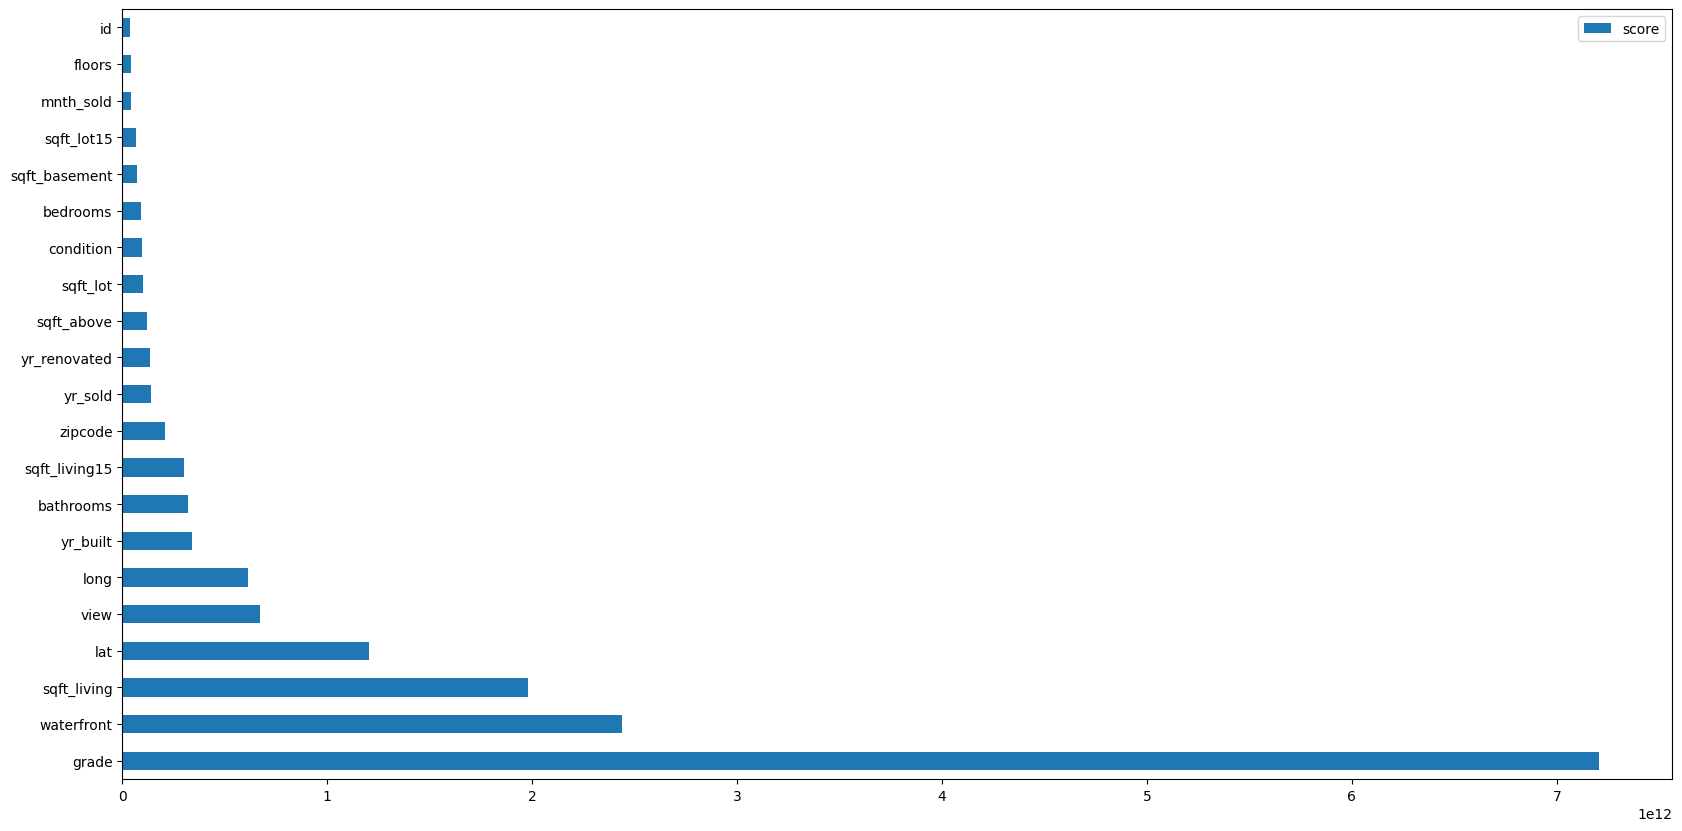

In [ ]:
# compare weight vs gain here
# weight = how many splits are based on that feature
# gain = how much the accuracy is affected by the feature
feature_important = model.get_booster().get_score(importance_type='gain')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.nlargest(40, columns="score").plot(kind='barh', figsize = (20,10)) ## plot top 40 features

### Graph the decision tree

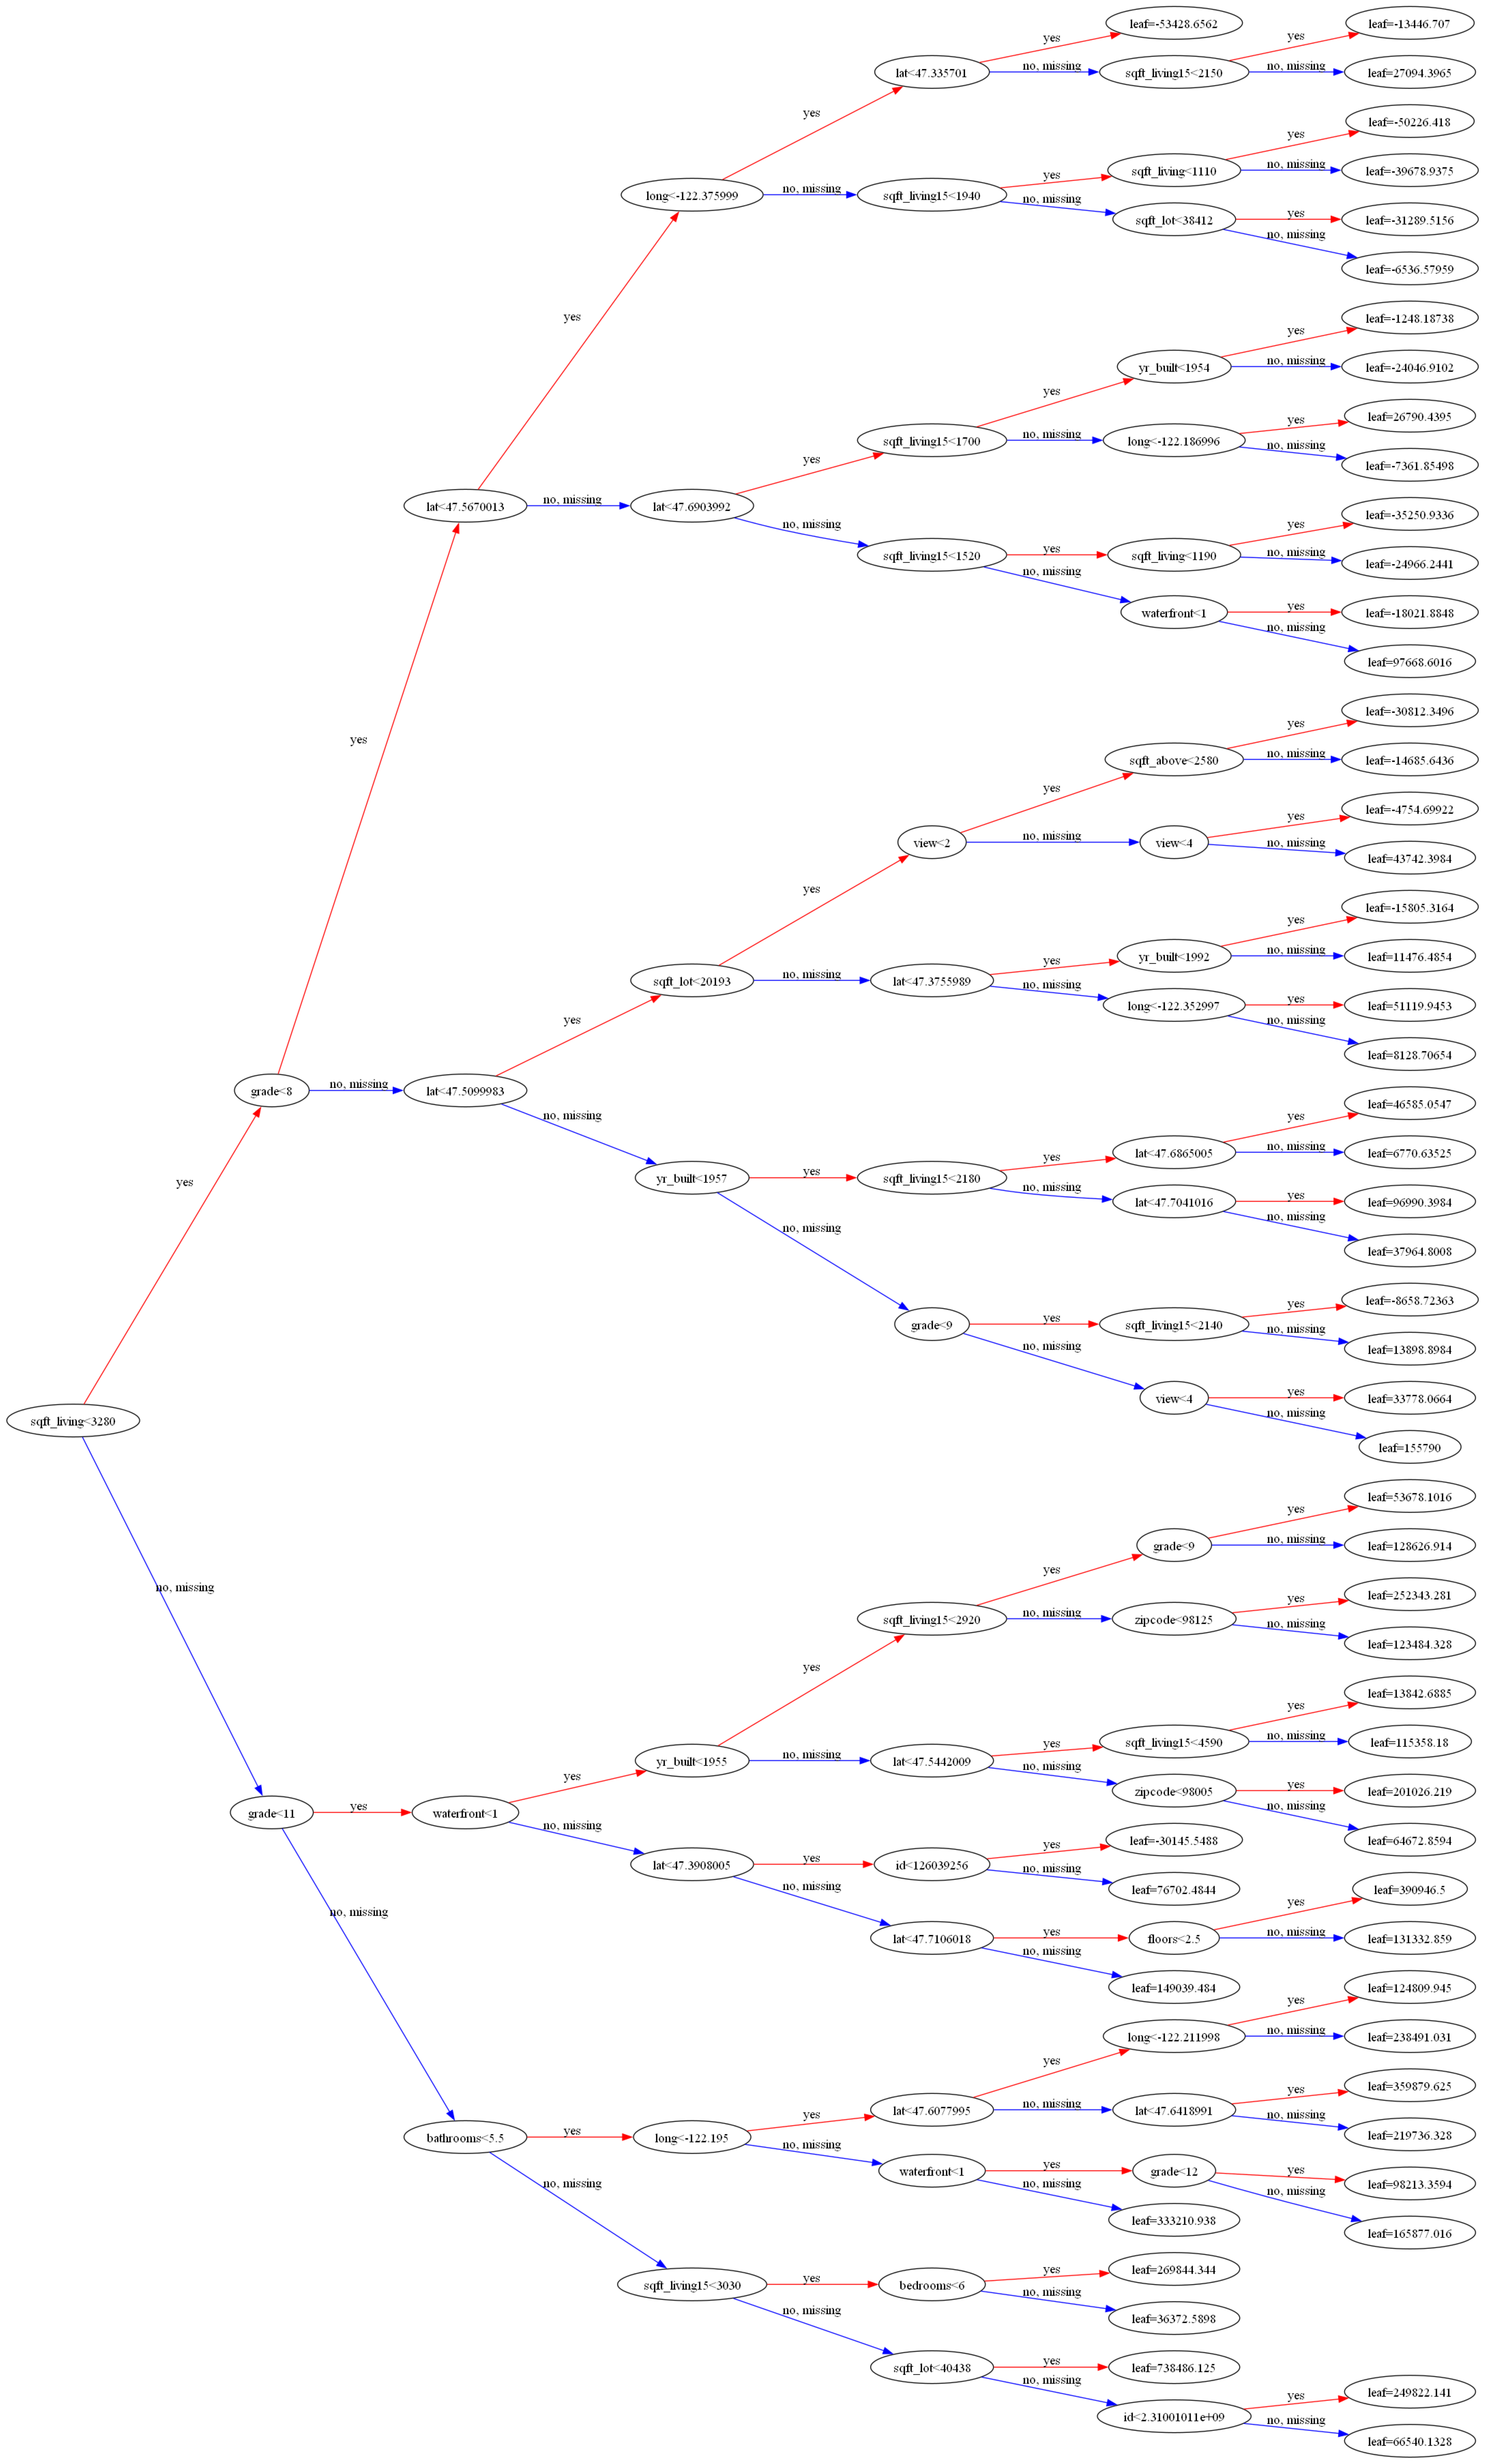

In [ ]:
# Commented out for performance

# plot_tree(model, num_trees=2, rankdir='LR')
# fig = matplotlib.pyplot.gcf()
# fig.set_size_inches(150, 100)
# fig.savefig('tree.png', bbox_inches='tight')